In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
cleaned_annual_data = pd.read_csv('../clean_data/cleaned_annual_data.csv')
total_annual = pd.read_csv('../clean_data/total_annual.csv')
monthly_data = pd.read_csv('../clean_data/cleaned_data_monthly.csv')
snowpack_data=pd.read_csv('../clean_data/yosemite_snowpack_clean.csv')

In [3]:
some_parks=['Grand Canyon NP','Yosemite NP','Olympic NP',
                   'Great Smoky Mountains NP','Canyonlands NP','Mount Rainier NP','Rocky Mountain NP',
                  'Yellowstone NP','Grand Teton NP','Glacier NP']

backcountry_parks=['Olympic NP','Great Smoky Mountains NP','Canyonlands NP','Mount Rainier NP','Rocky Mountain NP']
park_plots=[]
#colors=['yellow','blue','slategrey','brown','green']

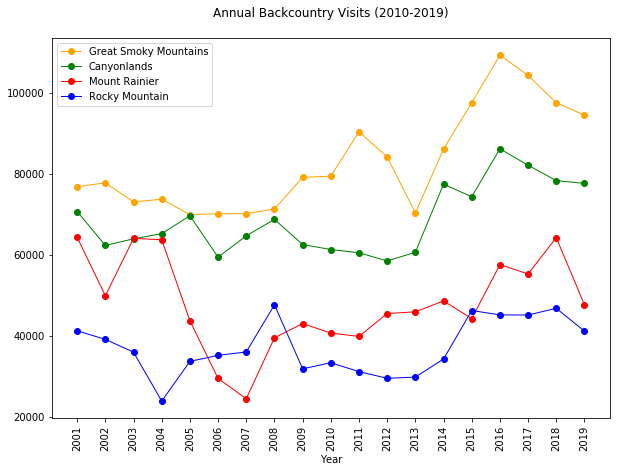

In [4]:
some_parks=['Grand Canyon','Yosemite','Olympic',
                   'Great Smoky Mountains','Canyonlands','Mount Rainier','Rocky Mountain',
                  'Yellowstone','Grand Teton','Glacier']

backcountry_parks=['Olympic','Great Smoky Mountains','Canyonlands','Mount Rainier','Rocky Mountain']
park_plots=[]
#colors=['yellow','blue','slategrey','brown','green']
plt.figure(figsize=(10,7))

def parkplot(park,color):
    parkx=cleaned_annual_data.loc[(cleaned_annual_data['ParkName']==park)]['Year']
    parky=cleaned_annual_data.loc[(cleaned_annual_data['ParkName']==park)]['BackcountryTotal']
    plt.xticks(np.arange(2001,2020,1),rotation=90)
    #plt.xlim(2010)
    plt.plot(parkx,parky,marker="o", linewidth=1,clip_on=False,color=color,label=park)

#parkplot(backcountry_parks[0],'blue')
parkplot(backcountry_parks[1],'orange')
parkplot(backcountry_parks[2],'green')
parkplot(backcountry_parks[3],'red')
parkplot(backcountry_parks[4],'blue')
plt.xlabel('Year')
plt.ylabel('')
plt.title('Annual Backcountry Visits (2010-2019)\n')
plt.legend()


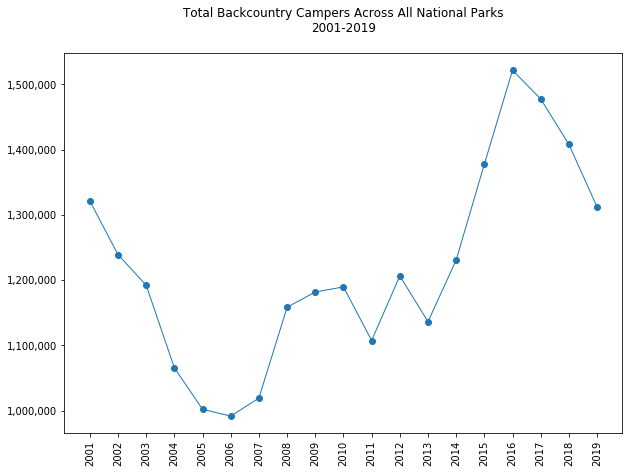

In [5]:
x_axis=total_annual['Year']
y_axis=total_annual['backcountry_total']
plt.figure(figsize=(10,7))
plt.xticks(np.arange(2001,2020,),rotation=90)
plt.title('Total Backcountry Campers Across All National Parks\n2001-2019\n')

plt.plot(x_axis,y_axis,marker="o", linewidth=1)

ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.savefig("../plots/total_backcountry.png")
plt.show()

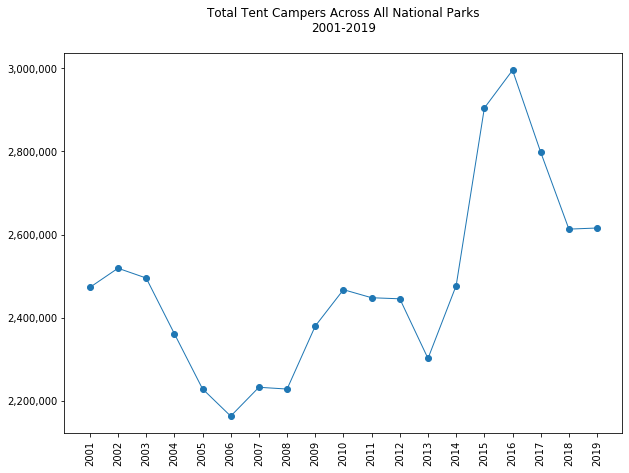

In [6]:
x_tent=total_annual['Year']
y_tent=total_annual['tent_total']
plt.figure(figsize=(10,7))
plt.xticks(np.arange(2001,2020,),rotation=90)
plt.title('Total Tent Campers Across All National Parks\n2001-2019\n')

plt.plot(x_tent,y_tent,marker="o", linewidth=1)

ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#plt.savefig("plots/total_tent.png")
plt.show()

In [7]:
yosemite=monthly_data.loc[(monthly_data['ParkName']=='Yosemite NP')]
yosemite_clean=yosemite.loc[(yosemite['Year']  > 2009),:]
yosemite_clean

,Unnamed: 0,ParkName,ParkType,Region,State,Year,Month,RecreationVisits,RecreationHours,TentCampers,RVCampers,Backcountry,RecreationVisitsTotal,RecreationHoursTotal,TentCampersTotal,RVCampersTotal,BackcountryTotal
29327,29327,Yosemite NP,National Park,Pacific West,CA,2010,1,96089,1225358,1082,1276,769,3901408,67692499,526026,265920,125136
29328,29328,Yosemite NP,National Park,Pacific West,CA,2010,2,100379,1454425,1700,1696,385,3901408,67692499,526026,265920,125136
29329,29329,Yosemite NP,National Park,Pacific West,CA,2010,3,149651,2605580,9890,7992,508,3901408,67692499,526026,265920,125136
29330,29330,Yosemite NP,National Park,Pacific West,CA,2010,4,224461,4418211,26634,29624,949,3901408,67692499,526026,265920,125136
29331,29331,Yosemite NP,National Park,Pacific West,CA,2010,5,382414,5660880,40693,26068,5996,3901408,67692499,526026,265920,125136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29442,29442,Yosemite NP,National Park,Pacific West,CA,2019,8,703153,12123498,116330,46524,42027,4422861,65508566,469585,211948,155578
29443,29443,Yosemite NP,National Park,Pacific West,CA,2019,9,584664,10787066,105165,41988,28464,4422861,65508566,469585,211948,155578
29444,29444,Yosemite NP,National Park,Pacific West,CA,2019,10,448939,6304836,43415,29664,7619,4422861,65508566,469585,211948,155578
29445,29445,Yosemite NP,National Park,Pacific West,CA,2019,11,230598,3077878,14666,12564,1182,4422861,65508566,469585,211948,155578


In [8]:
yosemite_year=pd.DataFrame(yosemite_clean.groupby('Month')['Backcountry'].mean())
#yosemite_month=yosemite_year.groupby('Month')
#yosemite_year['Backcountry'].mean()
#yosemite_year=yosemite_year.reset_index()
#yosemite_year['Backcountry']=int(round(yosemite_year['Backcountry']))
yosemite_year['Backcountry']=yosemite_year['Backcountry'].astype(int)

In [9]:
yosemite_year

,Backcountry
Month,
1,674
2,833
3,1378
4,1613
5,8935
6,28582
7,50935
8,43784
9,20621


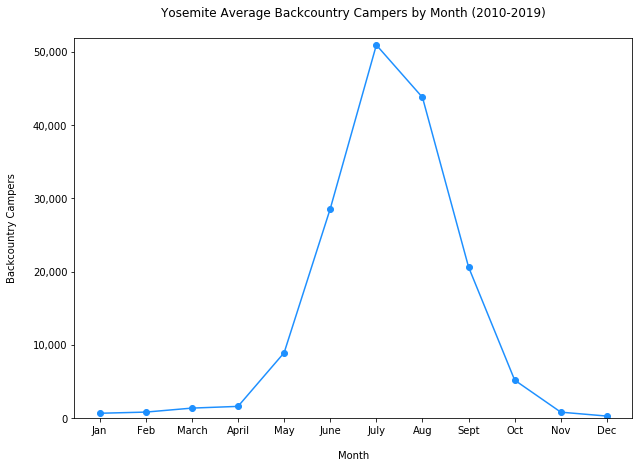

In [60]:
x_axis=['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
y_axis=yosemite_year['Backcountry']


#construct plot
#I'll just change the color here
plt.figure(figsize=(10,7))
plt.plot(x_axis, y_axis, color = 'dodgerblue', marker='o')
#rotate the x axis labels
#plt.xticks(rotation = 80)
plt.ylim(0,max(y_axis+1000))
plt.xlabel("\nMonth")
plt.ylabel('Backcountry Campers\n')
ax=plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title("Yosemite Average Backcountry Campers by Month (2010-2019)\n")
plt.savefig("../plots/yosemite_backcountry_month.png")

plt.show()

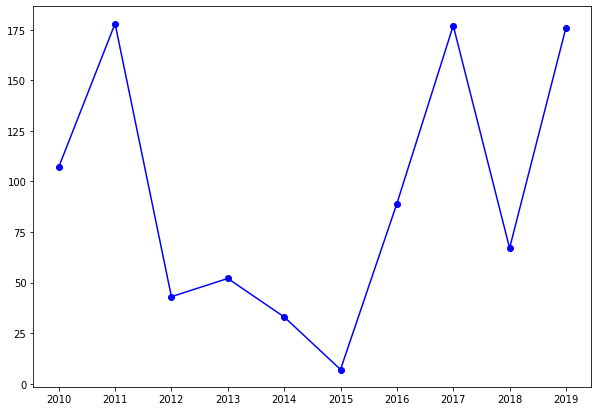

In [15]:
#(slope,int, r, p, std_err) from linregress
#construct plot
#I'll just change the color here
snowpack_df= snowpack_data.loc[(snowpack_data['Year']  > 2009),:]
snowx=snowpack_df['Year']
snowy=snowpack_df['Snowpack as of Apr 1']
plt.figure(figsize=(10,7))
plt.plot(snowx, snowy, color = 'blue', marker='o')
#rotate the x axis labels
plt.xticks(np.arange(2010,2020,1))
#plt.ylim(0,max(y_axis+1000))
#plt.xlabel("\nMonth")
#plt.ylabel('Backcountry Campers\n')
#plt.title("Yosemite Average Backcountry Campers by Month (2005-2019)\n")
plt.show()

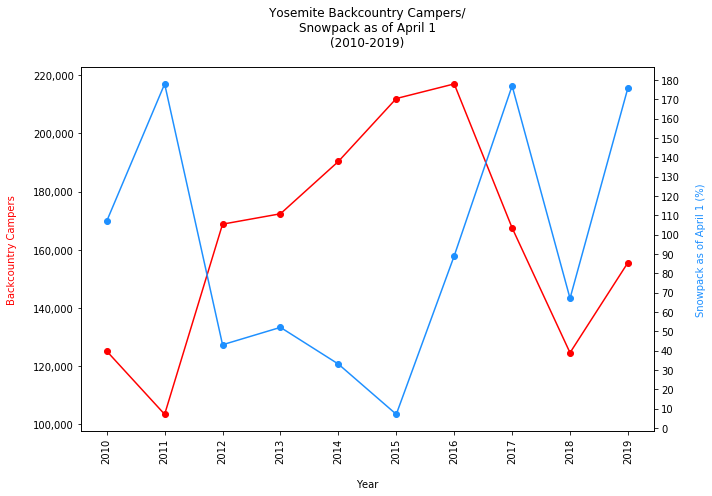

In [59]:
filter_df= cleaned_annual_data.loc[(cleaned_annual_data['Year']  > 2009),:]
x_axis=filter_df.loc[(filter_df['ParkName']=='Yosemite')]['Year']
#yosemite_clean=yosemite.loc[(yosemite['Year']  > 2009),:]
y_axis=filter_df.loc[(filter_df['ParkName']=='Yosemite')]['BackcountryTotal']

#plt.figure(figsize=(10,7))

#plt.title('Yosemite Backcountry Campers\n(2010-2019)\n')


fig, ax1 = plt.subplots(figsize=(10,7))


ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax1.set_xlabel('\nYear')
ax1.set_ylabel('Backcountry Campers\n', color='red')
ax1.plot(x_axis,y_axis,marker="o",markerfacecolor='red',color='red',clip_on=False)
plt.xticks(np.arange(2001,2020,),rotation=90)

#ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()


ax2.set_ylabel('\nSnowpack as of April 1 (%)', color='dodgerblue')  # we already handled the x-label with ax1
ax2.plot(snowx, snowy,marker='o',markerfacecolor='dodgerblue', color='dodgerblue',clip_on=False)
ax2.set_yticks(np.arange(0,snowy.max()+10,10))
plt.title('Yosemite Backcountry Campers/\nSnowpack as of April 1\n(2010-2019)\n')


fig.tight_layout()





plt.savefig("../plots/yosemite_backcountry_snowpack.png")







#ax2.tick_params(axis='y', labelcolor=color)
plt.show()

In [ ]:
snowpack_data

In [ ]:
#total_annual

In [ ]:
x_axis=total_annual['Year']
y_axis=total_annual['RecreationVisitsTotal']
plt.figure(figsize=(10,7))
plt.xticks(np.arange(2001,2020,1),rotation=90)
plt.yticks(np.arange(round(y_axis.min(),-7)-10000000,round(y_axis.max(),-7)+10000000,2500000))


plt.title('Total Annual Recreational Visits Across All National Parks\n2001-2019\n')
plt.plot(x_axis,y_axis,marker="o", linewidth=1)
ax = plt.gca()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.annotate('89,815,063',(2016.6,89505063),color='red')
plt.annotate('68,064,224',(2013.5,67864224),color='red')
plt.annotate('70,168,104',(2000.7,68768104),color='red')

plt.savefig("../plots/total_annual_visits.png")
plt.show()